# <center>Climate Change Analysis</center>
## Overview
This project is to analyze the climate change over the recent years and to estimate the effect it will have on life of Earth in the coming decades. While many factors influence climate change, a majority of the problem according to many journals from climate experts is caused by humans.<br>
This project takes some of the factors that cause climate change and are linked to human activity - Deforestation, fossil fuel burning, and raise in atmospheric CO2 levels. The aim of this project is to establish a correlation between human factors, temperature rise, and raise in the rate of occurance of natural events like thunderstorms, hails, tornados, rain, and snow.
<br><br>
<center>Human factors &rarr; Temperature change &rarr; Raise in natural calamities</center>
<br>
The report outlines some states in the US. To show a complete spectrum of climate change in the US, I chose specific states across the terrain of US, based on the availability of CO2 data - <br>
<b>North:</b> Wisconsin <br>
<b>Central:</b> Colorado <br>
<b>South:</b> Hawaii, Texas <br>
<b>East:</b> Florida <br>
<b>West:</b> California <br>

<b>Plus:</b> Other key states with interesting insight.

*Some charts in the report are interactive. Select the legend to see certain elements of the chart. Select the area of the chart to zoom in. Double click to reset. Interactive charts are indicated by symbol* &#9757;

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
#Import all the required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings

In [2]:
#Set the report styling parameters using Jupyter Notebook magic commands

%matplotlib inline
init_notebook_mode(connected=True)
plt.rcParams['figure.figsize'] = (12, 9)

warnings.filterwarnings('ignore')

In [3]:
#Load and merge the data from github. These files are cleaned and forecasted in other Python programs. 
#Check my github repository (https://github.com/KrishnaMuluguru/ClimateChangeProject1) for the data wrangling code and details. 

CO2_Concentration = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/CO2_Concentration_forecasted.csv',parse_dates = ['Date'],index_col=['Date','State'])
Temperature_Data = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/GSOD_All_Data_no_outliers.csv',parse_dates = ['Date'],index_col=['Date','State'])
Fuel_Consumption = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/Fuel_Consumption.csv',parse_dates = ['Date'],index_col=['Date','State'])
Land_Use = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/Land_Use_Data.csv',parse_dates = ['Date'],index_col=['Date','State'])

Climate_Data1 = pd.merge(CO2_Concentration, Temperature_Data, how='right', left_index=True, right_index=True)
Climate_Data2 = pd.merge(Fuel_Consumption, Land_Use, how='outer', left_index=True, right_index=True)
Climate_Data = pd.merge(Climate_Data1, Climate_Data2, how='left', left_index=True, right_index=True)

## North

### Wisconsin (WI)

In [4]:
CO2_States_List = ['AK', 'CA', 'CO', 'FL', 'HI', 'OK', 'OR', 'UT', 'VI', 'WA', 'WI']
Current_State = 'WI'

In [5]:
#Extract all data for WI
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')==Current_State,:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [6]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

#### Temperature Trend

The chart below shows temperature trend for Wisconsin since 1975.

The chart shows fluctuations in the trend in Wisconsin temperatures. Closely examining the trend lines shows that the Max, Avg, and Min temperatures increased slightly by around 1&#8457;

&#9757;

In [7]:
traceTempMaxRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX.rolling(48).mean(),name='Max Temperature trend')
traceTempAvgRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG.rolling(48).mean(),name='Avg Temperature trend')
traceTempMinRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN.rolling(48).mean(),name='Min Temperature trend')
traceTempMax = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX,name='Max Temperature')
traceTempAvg = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG,name='Avg Temperature')
traceTempMin = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN,name='Min Temperature')
layoutTempDate = go.Layout(title='Temperature over Time - ' + Current_State,showlegend=True)
figTempDate = go.Figure(data=[traceTempMaxRoll,traceTempAvgRoll,traceTempMinRoll,traceTempMax,traceTempAvg,traceTempMin],layout=layoutTempDate)
plotly.offline.iplot(figTempDate)

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years.

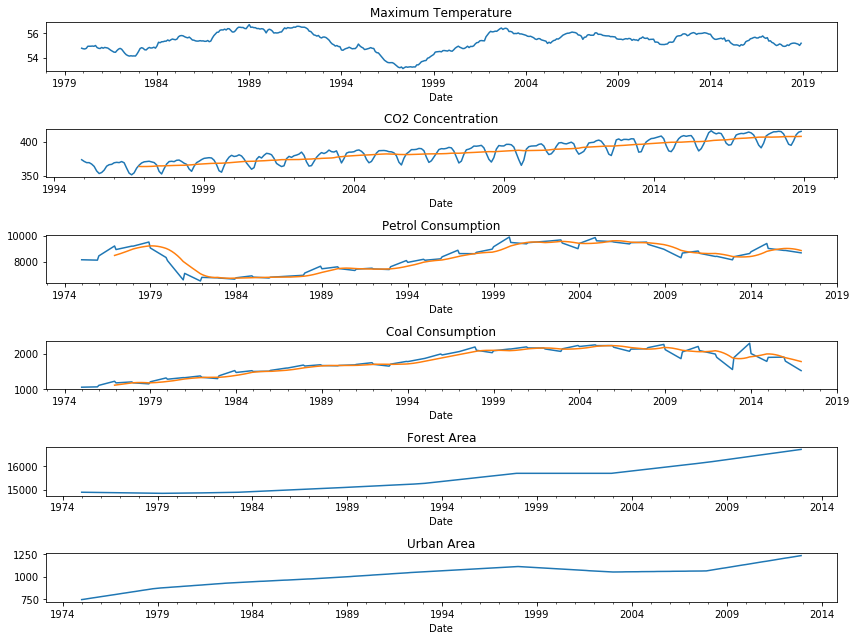

In [8]:
plt.subplot(6,1,1)
Climate_Data_State.TempMAX.rolling(60).mean().plot()
plt.title('Maximum Temperature')
plt.subplot(6,1,2)
Climate_Data_State.CO2_Concentration.plot()
Climate_Data_State.CO2_Concentration.rolling(24).mean().plot()
plt.title('CO2 Concentration')
plt.subplot(6,1,3)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(6,1,4)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(6,1,5)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.subplot(6,1,6)
Climate_Data_State.Urban_Area.plot()
plt.title('Urban Area')
plt.tight_layout()

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area doesn't seem to have an effect on temperatures<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>
**CO2 Concentration:** The chart shows that increase in atmospheric CO2 concentration correspond to decrease in temperatures, contrary to the scientific explanation. This could be due to low correlation values of CO2 data with available temperature data.

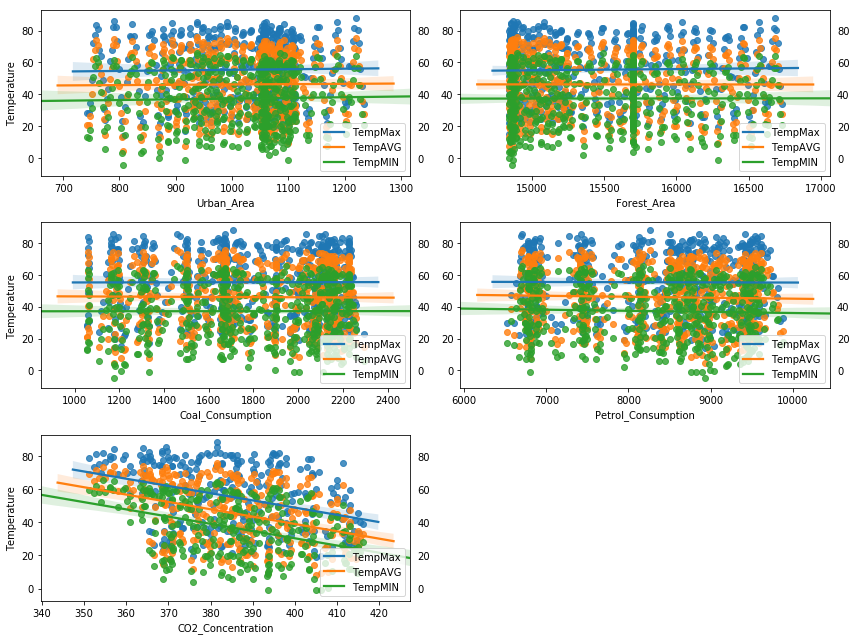

In [9]:
plt.subplot(3,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,5)
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
**Tornado:** Raise in temperature corresponds to increase in torando occurances.<br>
**Hail:** Raise in temperature corresponds to increase in hail occurances.<br>
**Rain:** Raise in temperature corresponds to increase in rainfall.<br>
**Snow:** Raise in temperature corresponds to decrease in snowfall.

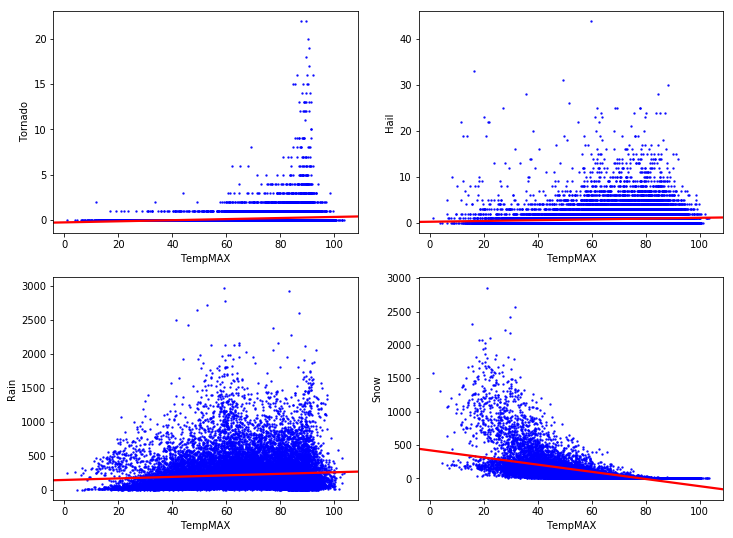

In [10]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data,y='Tornado',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data,y='Hail',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data,y='Rain',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data,y='Snow',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

## Central

### Colorado (CO)

In [11]:
Current_State = 'CO'

In [12]:
#Extract all data for CO
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')==Current_State,:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [13]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

#### Temperature Trend

The chart below shows temperature trend for Colorado since 1975.

The chart shows fluctuations in the trend in Colorado temperatures. Closely examining the trend lines shows that the Max, Avg, and Min temperatures fluctuated over the years with an upward trend.

&#9757;

In [14]:
traceTempMaxRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX.rolling(48).mean(),name='Max Temperature trend')
traceTempAvgRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG.rolling(48).mean(),name='Avg Temperature trend')
traceTempMinRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN.rolling(48).mean(),name='Min Temperature trend')
traceTempMax = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX,name='Max Temperature')
traceTempAvg = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG,name='Avg Temperature')
traceTempMin = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN,name='Min Temperature')
layoutTempDate = go.Layout(title='Temperature over Time - ' + Current_State ,showlegend=True)
figTempDate = go.Figure(data=[traceTempMaxRoll,traceTempAvgRoll,traceTempMinRoll,traceTempMax,traceTempAvg,traceTempMin],layout=layoutTempDate)
plotly.offline.iplot(figTempDate)

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years.

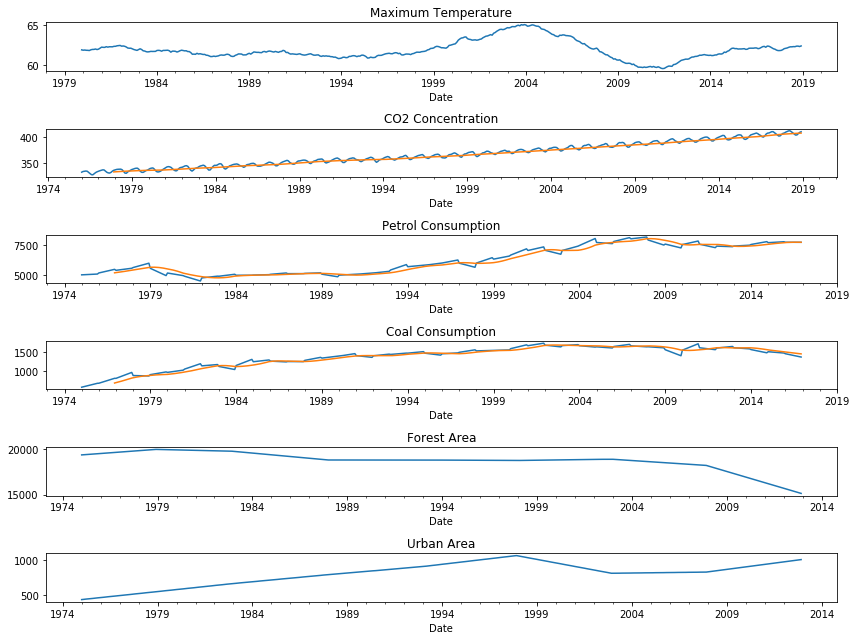

In [15]:
plt.subplot(6,1,1)
Climate_Data_State.TempMAX.rolling(60).mean().plot()
plt.title('Maximum Temperature')
plt.subplot(6,1,2)
Climate_Data_State.CO2_Concentration.plot()
Climate_Data_State.CO2_Concentration.rolling(24).mean().plot()
plt.title('CO2 Concentration')
plt.subplot(6,1,3)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(6,1,4)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(6,1,5)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.subplot(6,1,6)
Climate_Data_State.Urban_Area.plot()
plt.title('Urban Area')
plt.tight_layout()

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area doesn't seem to have an effect on temperatures<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>
**CO2 Concentration:** The chart shows that increase in atmospheric CO2 concentration correspond to decrease in temperatures, contrary to the scientific explanation. This could be due to low correlation values of CO2 data with available temperature data.

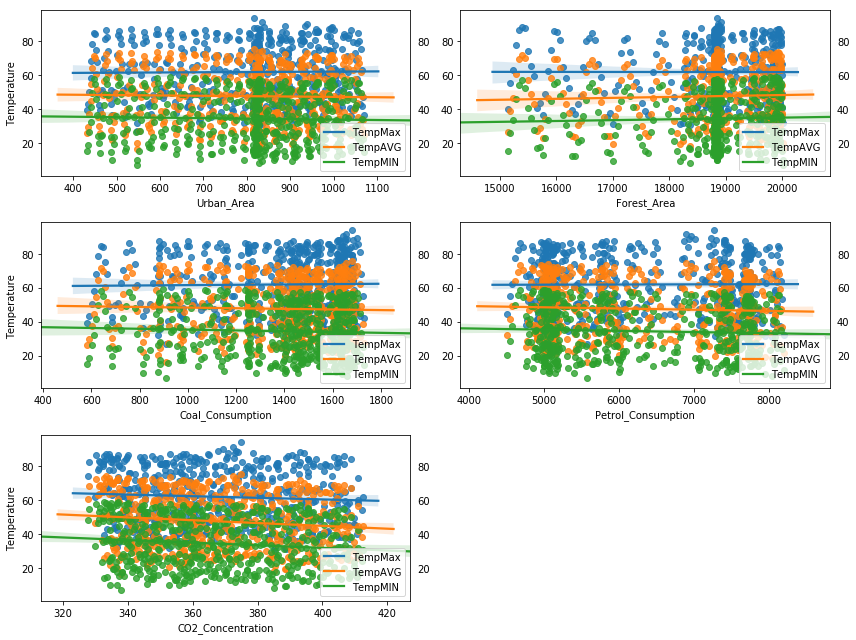

In [16]:
plt.subplot(3,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,5)
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
**Tornado:** Raise in temperature corresponds to increase in torando occurances.<br>
**Hail:** Raise in temperature corresponds to increase in hail occurances.<br>
**Rain:** Raise in temperature corresponds to increase in rainfall.<br>
**Snow:** Raise in temperature corresponds to decrease in snowfall.

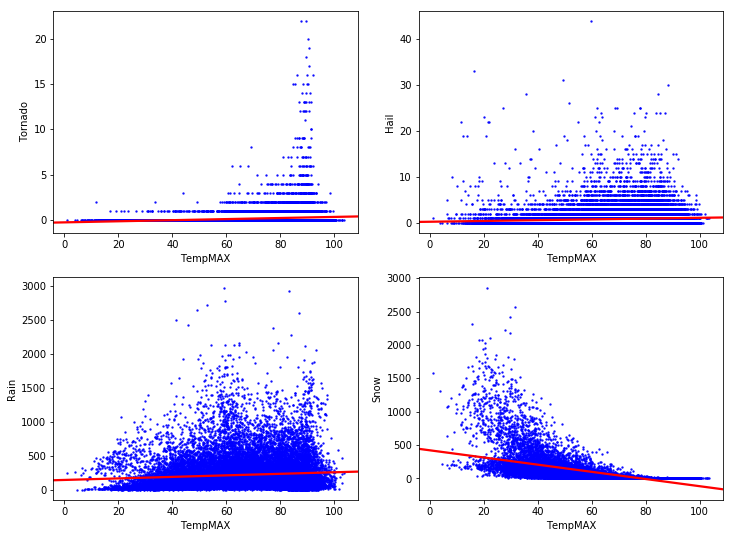

In [17]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data,y='Tornado',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data,y='Hail',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data,y='Rain',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data,y='Snow',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

## South

### Texas (TX)

In [18]:
Current_State = 'TX'

In [19]:
#Extract all data for TX
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')==Current_State,:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [20]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

#### Temperature Trend

The chart below shows temperature trend for Texas since 1975.

The chart shows fluctuations in the trend in Texas temperatures. Closely examining the trend lines shows that the Max, Avg, and Min temperatures fluctuated over the years with an upward trend.

&#9757;

In [21]:
traceTempMaxRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX.rolling(48).mean(),name='Max Temperature trend')
traceTempAvgRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG.rolling(48).mean(),name='Avg Temperature trend')
traceTempMinRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN.rolling(48).mean(),name='Min Temperature trend')
traceTempMax = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX,name='Max Temperature')
traceTempAvg = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG,name='Avg Temperature')
traceTempMin = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN,name='Min Temperature')
layoutTempDate = go.Layout(title='Temperature over Time - ' + Current_State ,showlegend=True)
figTempDate = go.Figure(data=[traceTempMaxRoll,traceTempAvgRoll,traceTempMinRoll,traceTempMax,traceTempAvg,traceTempMin],layout=layoutTempDate)
plotly.offline.iplot(figTempDate)

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years.

Texas shows an increase in all the factors that lead to increase in temperature, which corresponded to drastic increase in maximum temperature over the years.

**Texas doesn't have CO2 Concentration data*

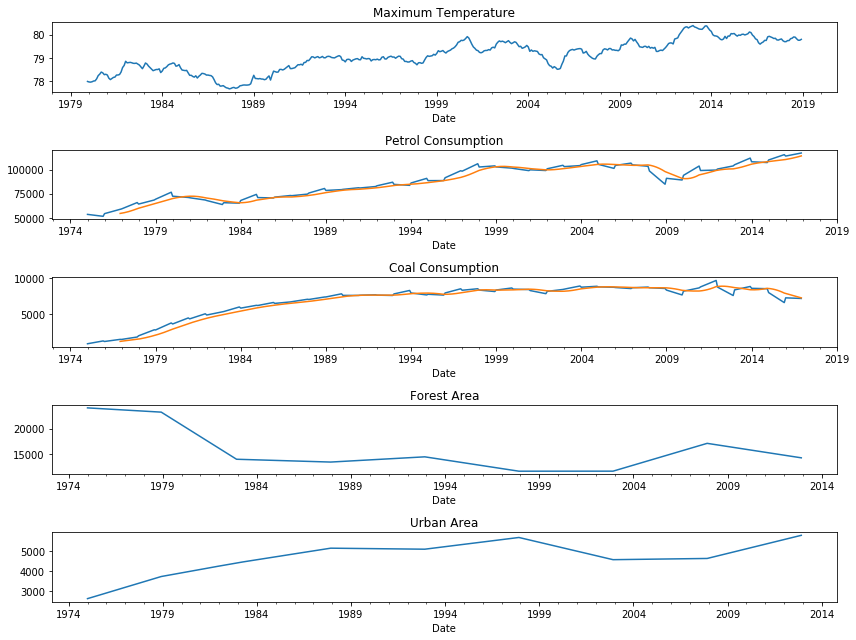

In [22]:
plt.subplot(5,1,1)
Climate_Data_State.TempMAX.rolling(60).mean().plot()
plt.title('Maximum Temperature')
plt.subplot(5,1,2)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(5,1,3)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(5,1,4)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.subplot(5,1,5)
Climate_Data_State.Urban_Area.plot()
plt.title('Urban Area')
plt.tight_layout()

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area show a decrease in temperatures<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>

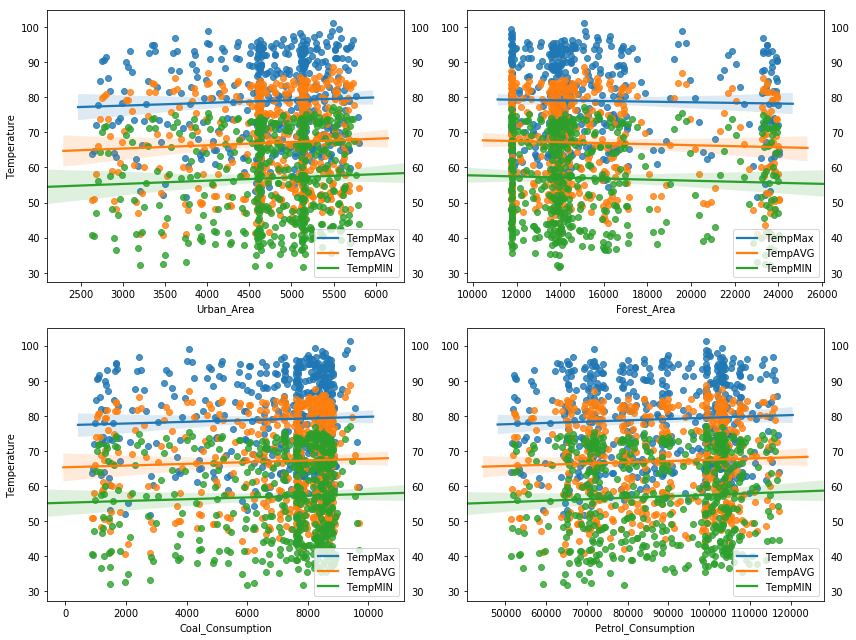

In [23]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
**Tornado:** Raise in temperature corresponds to increase in torando occurances.<br>
**Hail:** Raise in temperature corresponds to increase in hail occurances.<br>
**Rain:** Raise in temperature corresponds to increase in rainfall.<br>
**Snow:** Raise in temperature corresponds to decrease in snowfall.

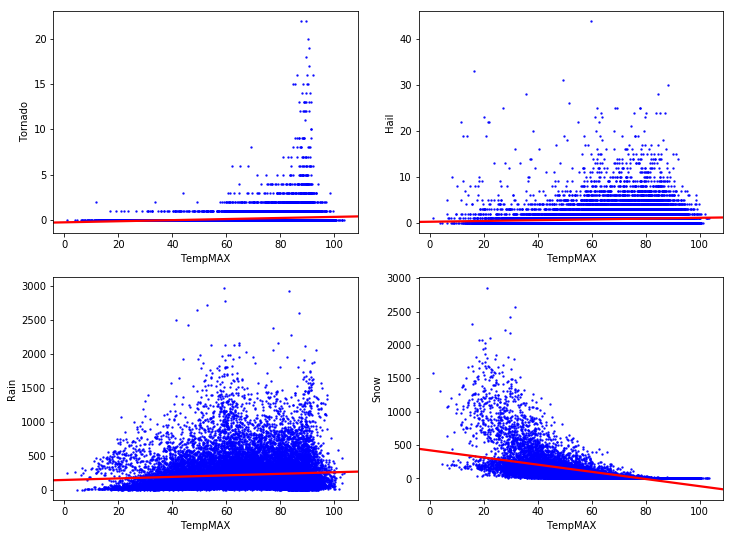

In [24]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data,y='Tornado',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data,y='Hail',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data,y='Rain',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data,y='Snow',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

### Hawaii (HI)

In [25]:
Current_State = 'HI'

In [26]:
#Extract all data for HI
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')==Current_State,:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [27]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

#### Temperature Trend

The chart below shows temperature trend for Hawaii since 1975.

The chart shows fluctuations in the trend in Hawaii temperatures. Closely examining the trend lines shows that the Max, Avg, and Min temperatures fluctuated over the years with varying trend.

&#9757;

In [28]:
traceTempMaxRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX.rolling(48).mean(),name='Max Temperature trend')
traceTempAvgRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG.rolling(48).mean(),name='Avg Temperature trend')
traceTempMinRoll = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN.rolling(48).mean(),name='Min Temperature trend')
traceTempMax = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMAX,name='Max Temperature')
traceTempAvg = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempAVG,name='Avg Temperature')
traceTempMin = go.Line(x=Climate_Data_State.index, y=Climate_Data_State.TempMIN,name='Min Temperature')
layoutTempDate = go.Layout(title='Temperature over Time - ' + Current_State ,showlegend=True)
figTempDate = go.Figure(data=[traceTempMaxRoll,traceTempAvgRoll,traceTempMinRoll,traceTempMax,traceTempAvg,traceTempMin],layout=layoutTempDate)
plotly.offline.iplot(figTempDate)

#### Factor Visualization

The chart below shows the trends of Maximum temparature with all the other factors - CO2 concentration, Fossil fuel consumption, and Land use.

Temperature is dependent on many factors. Examining the chart shows fluctuations in average maximum temperature and dependent factors over the years.

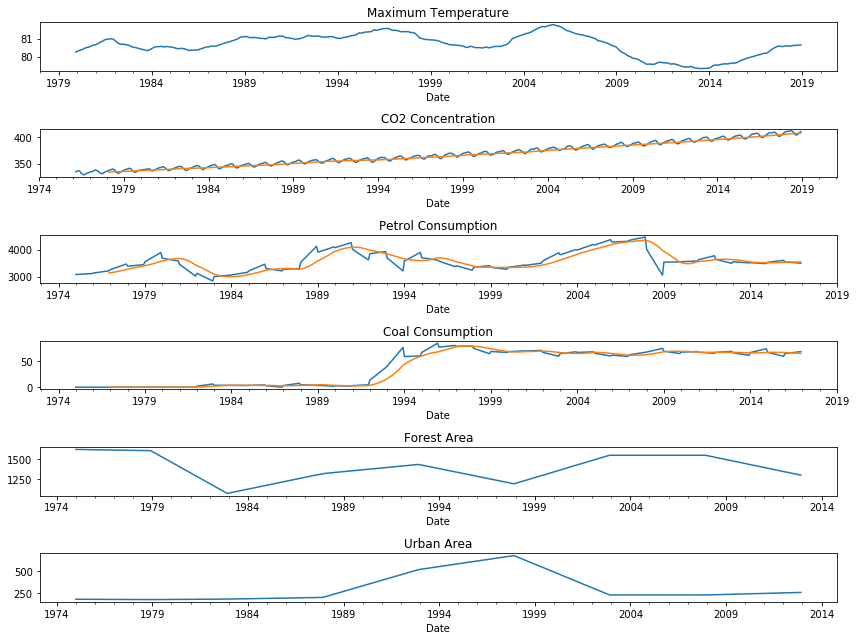

In [29]:
plt.subplot(6,1,1)
Climate_Data_State.TempMAX.rolling(60).mean().plot()
plt.title('Maximum Temperature')
plt.subplot(6,1,2)
Climate_Data_State.CO2_Concentration.plot()
Climate_Data_State.CO2_Concentration.rolling(24).mean().plot()
plt.title('CO2 Concentration')
plt.subplot(6,1,3)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(6,1,4)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(6,1,5)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.subplot(6,1,6)
Climate_Data_State.Urban_Area.plot()
plt.title('Urban Area')
plt.tight_layout()

#### Temperature Factor Correlation

The regression plot below shows effect of all the factors over Max, Avg, and Min temperatures over the years.<br>
**Urban Area:** Increase in Urban Area corresponds to increase in temperatures<br>
**Forest Area:** Increase in Forest Area doesn't seem to have an effect on temperatures<br>
**Coal Consumption:** Increase in consumption of coal corresponds to increase in temperatures<br>
**Petrol Consumption:** Increase in consumption of petrol corresponds to increase in temperatures<br>
**CO2 Concentration:** The chart shows that increase in atmospheric CO2 concentration correspond to decrease in temperatures, contrary to the scientific explanation. This could be due to low correlation values of CO2 data with available temperature data.

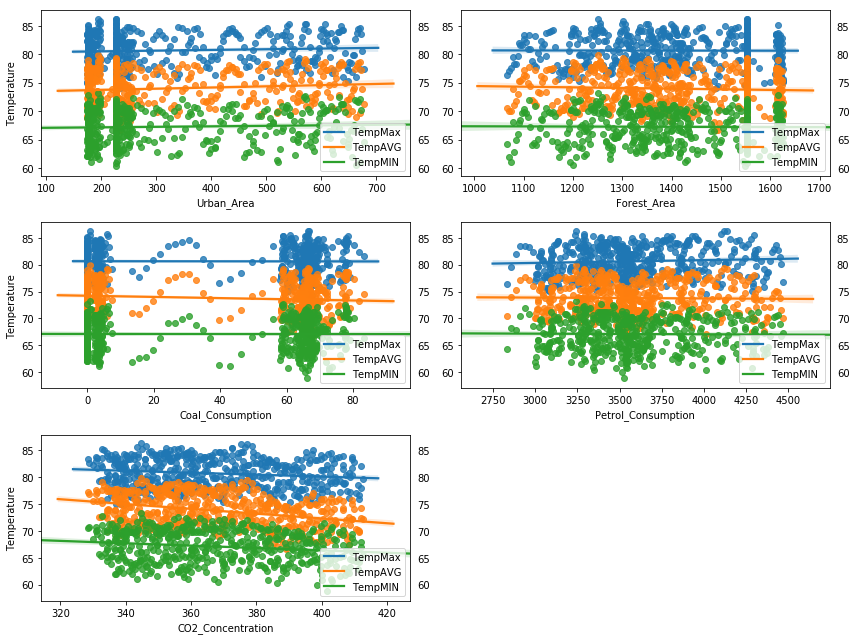

In [30]:
plt.subplot(3,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,5)
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

#### Natural Event Correlation

Raise in temperatures have adverse affects on Earth's natural pheonomena. The chart below shows the effect of temperature changes in natural event occurances.<br>
**Tornado:** Raise in temperature corresponds to increase in torando occurances.<br>
**Hail:** Raise in temperature corresponds to increase in hail occurances.<br>
**Rain:** Raise in temperature corresponds to increase in rainfall.<br>
**Snow:** Raise in temperature corresponds to decrease in snowfall.

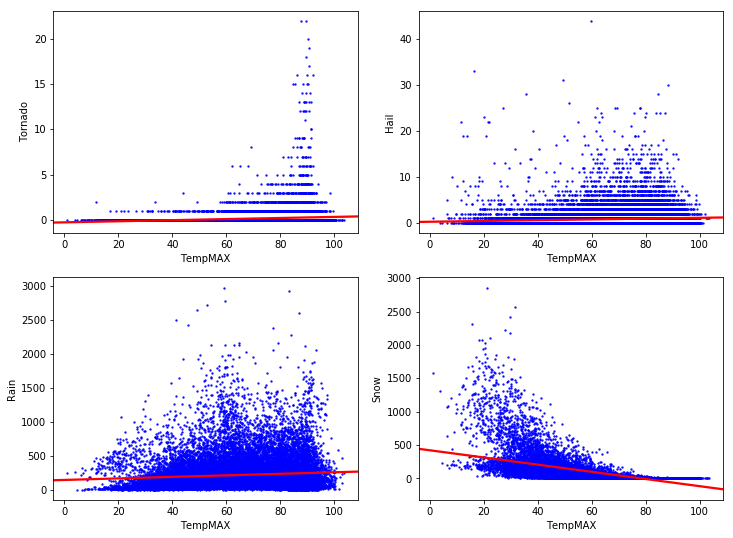

In [31]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data,y='Tornado',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data,y='Hail',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data,y='Rain',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data,y='Snow',x='TempMAX',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()